In [1]:
#Importing required libraries

import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [29]:
#Path to your COCO annotation file - json file

ANNOTATION_FILE = r"C:\Users\Lenovo\Downloads\coco2017_subset\coco2017_subset\annotation_subset\person_keypoints_train2017_subset.json"

#Folder where the corresponding images are stored

IMAGE_FOLDER = r"C:\Users\Lenovo\Downloads\coco2017_subset\coco2017_subset\train2017"

In [30]:
#Initializing COCO API for instance annotations

coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=7.91s)
creating index...
index created!


In [9]:
#Getting the images IDs

img_ids = coco.getImgIds()
if not img_ids:
    raise ValueError("No images found in the annotation file!")

In [10]:
#Loading the first image from the dataset

img_data = coco.loadImgs(img_ids[1])[0]

In [11]:
#Constructing the image path and load it using OpenCV

img_path = os.path.join(IMAGE_FOLDER, img_data['file_name'])
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

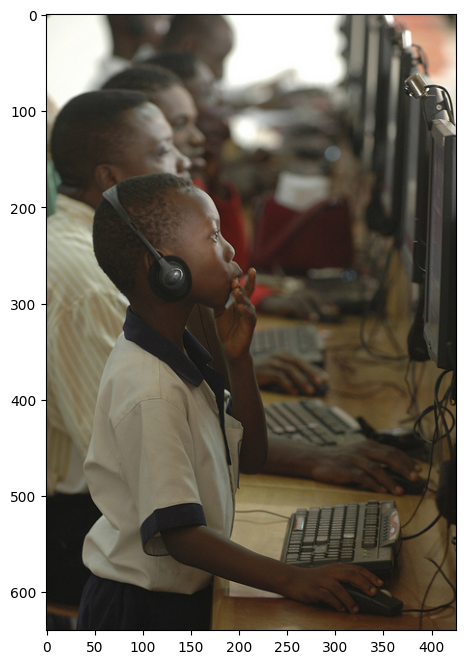

In [12]:
#Converting image from BGR to RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image)

In [13]:
# Getting all category IDs
category_ids = coco.getCatIds()

# Loading category names
categories = coco.loadCats(category_ids)

# Extracting names
class_names = [category['name'] for category in categories]

print("Classes in the dataset:", class_names)

Classes in the dataset: ['person']


In [14]:
#Path to your COCO annotation file - json file

ANNOTATION_FILE_1 = r"C:\Users\Lenovo\Downloads\coco2017_subset\coco2017_subset\annotation_subset\instances_train2017_subset.json"

#Folder where the corresponding images are stored

IMAGE_FOLDER = r"C:\Users\Lenovo\Downloads\coco2017_subset\coco2017_subset\train2017"

In [15]:
#Initializing COCO API for instance annotations

coco1 = COCO(ANNOTATION_FILE_1)

loading annotations into memory...
Done (t=19.19s)
creating index...
index created!


In [16]:
# Get all category IDs and their names
category_ids = coco1.getCatIds()
categories = coco1.loadCats(category_ids)
category_names = {cat['id']: cat['name'] for cat in categories}

# Get the number of classes
num_classes = len(category_ids)

# Get the total number of images
img_ids = coco1.getImgIds()
num_images = len(img_ids)

# Print total counts
print(f"Number of classes: {num_classes}")
print(f"Number of images: {num_images}")

# Dictionary to store the number of images per class
class_image_count = {}

# Count the number of images for each class
for cat_id in category_ids:
    img_ids = coco1.getImgIds(catIds=[cat_id])  # Get images containing this class
    class_image_count[category_names[cat_id]] = len(img_ids)

# Print the number of images per class
print("\nNumber of images per class:")
for class_name, count in class_image_count.items():
    print(f"{class_name}: {count} images")


Number of classes: 80
Number of images: 29571

Number of images per class:
person: 15978 images
bicycle: 808 images
car: 3063 images
motorcycle: 857 images
airplane: 781 images
bus: 951 images
train: 872 images
truck: 1572 images
boat: 772 images
traffic light: 967 images
fire hydrant: 432 images
stop sign: 458 images
parking meter: 176 images
bench: 1354 images
bird: 826 images
cat: 1064 images
dog: 1149 images
horse: 767 images
sheep: 381 images
cow: 463 images
elephant: 528 images
bear: 231 images
zebra: 485 images
giraffe: 644 images
backpack: 1394 images
umbrella: 962 images
handbag: 1706 images
tie: 994 images
suitcase: 623 images
frisbee: 557 images
skis: 787 images
snowboard: 442 images
sports ball: 1083 images
kite: 558 images
baseball bat: 603 images
baseball glove: 621 images
skateboard: 894 images
surfboard: 899 images
tennis racket: 871 images
bottle: 2061 images
wine glass: 622 images
cup: 2271 images
fork: 844 images
knife: 1051 images
spoon: 861 images
bowl: 1742 images

In [17]:
# Get dataset statistics
num_images = len(coco1.dataset['images'])
num_boxes = len(coco1.dataset['annotations'])
num_classes = len(coco1.dataset['categories'])

# Extract image dimensions (height & width)
image_heights = [img['height'] for img in coco1.dataset['images']]
image_widths = [img['width'] for img in coco1.dataset['images']]

# Compute statistics for height and width
max_height = max(image_heights)
min_height = min(image_heights)
avg_height = sum(image_heights) // num_images

max_width = max(image_widths)
min_width = min(image_widths)
avg_width = sum(image_widths) // num_images

# Print dataset summary
print(f"Dataset Name: {ANNOTATION_FILE_1.split(os.sep)[-1]}")
print(f"Number of images: {num_images}")
print(f"Number of bounding boxes: {num_boxes}")
print(f"Number of classes: {num_classes}")

Dataset Name: instances_train2017_subset.json
Number of images: 29571
Number of bounding boxes: 212806
Number of classes: 80


In [6]:
import os
import random  # Ensure random module is imported
import matplotlib.pyplot as plt
from skimage import io
from pycocotools.coco import COCO


In [15]:
# Get all category IDs
category_ids = coco1.getCatIds()


In [17]:
# Get category names
category_names = {cat['id']: cat['name'] for cat in coco1.loadCats(category_ids)}


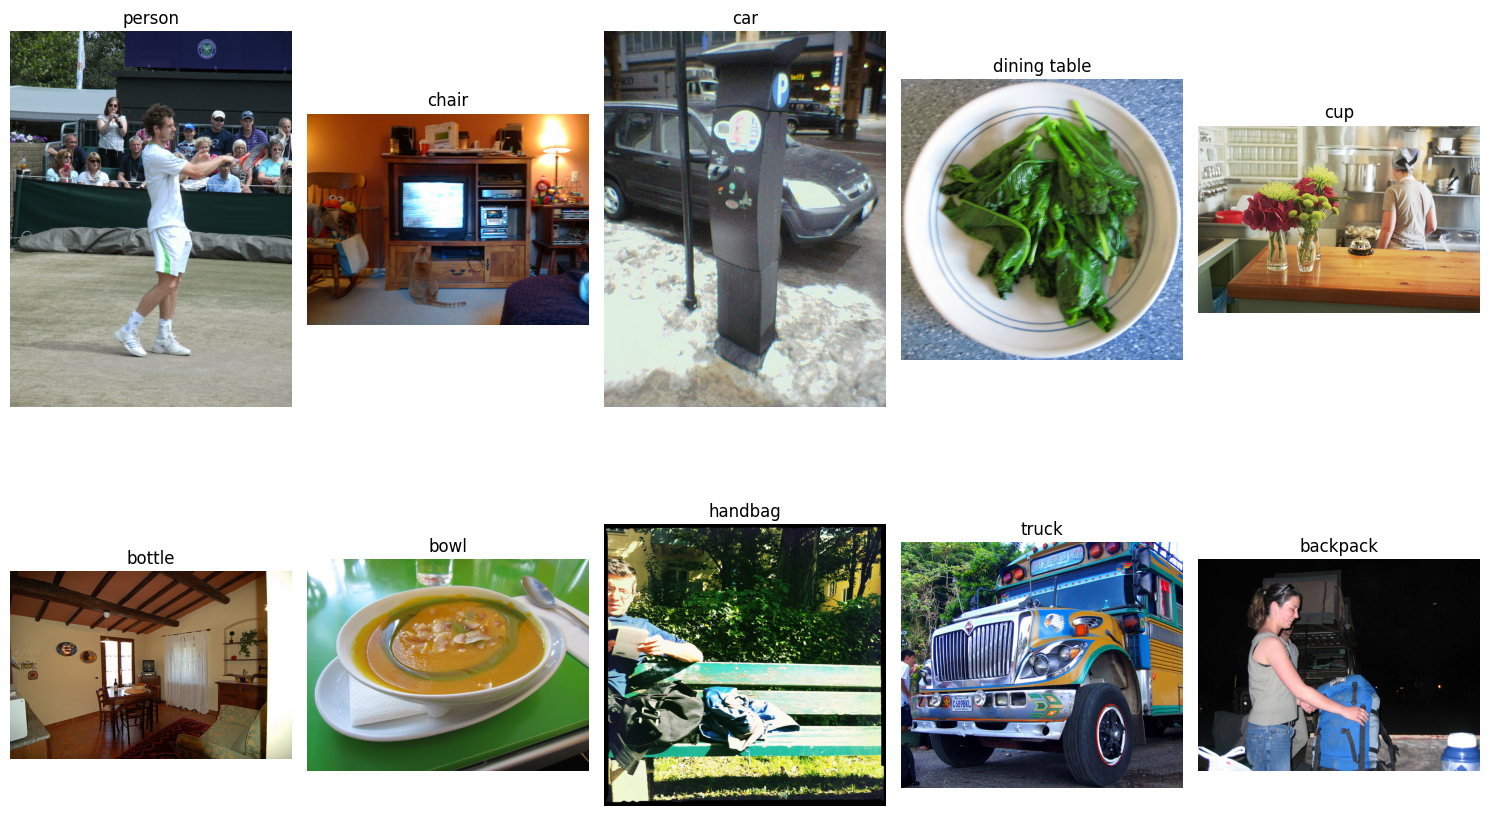

In [18]:
# Count images per class
class_image_count = {cat_id: len(coco1.getImgIds(catIds=[cat_id])) for cat_id in category_ids}

# Sort categories by number of images and get the top 10
top_classes = sorted(class_image_count.items(), key=lambda x: x[1], reverse=True)[:10]

# Load and display one image from each of the top 10 classes
plt.figure(figsize=(15, 10))

for i, (cat_id, _) in enumerate(top_classes):
    img_ids = coco1.getImgIds(catIds=[cat_id])
    if not img_ids:
        continue
    random_img_id = random.choice(img_ids)  # Randomly pick an image from the class
    img_data = coco1.loadImgs(random_img_id)[0]
    img_path = os.path.join(IMAGE_FOLDER, img_data['file_name'])
    image = io.imread(img_path)
    
    # Plot image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(category_names[cat_id])

plt.tight_layout()
plt.show()

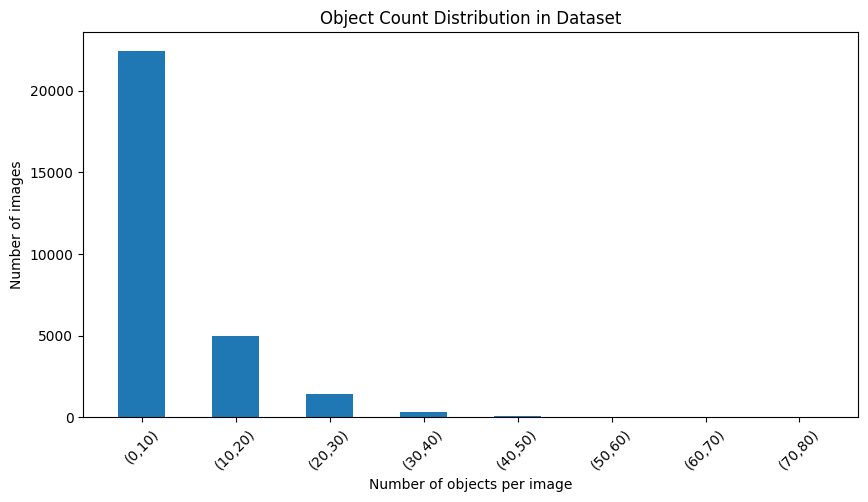

Number of images with at least one bounding box: 29315
Min number of boxes per image: 1
Max number of boxes per image: 78
Avg number of boxes per image: 7


In [22]:
# Mapping "image id" to "number of boxes"
img2nboxes = {}

for ann in coco1.dataset['annotations']:
    img_id = ann['image_id']
    img2nboxes[img_id] = img2nboxes.get(img_id, 0) + 1  

# Convert to list for analysis
nboxes_list = list(img2nboxes.values())

# Compute statistics
min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = sum(nboxes_list) // len(nboxes_list)

# Histogram binning for object distribution per image
out = pd.cut(nboxes_list, bins=np.arange(0, max_nboxes + 10, 10), include_lowest=True)
counts = out.value_counts().values
labels = [(int(i.left), int(i.right)) for i in out.value_counts().index.categories]

# Extract x-axis values & labels
graph_xind = [i[0] for i in labels] 
ticks = [f"({i[0]},{i[1]})" for i in labels]

# Plot distribution
plt.figure(figsize=(10, 5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects per image')
plt.ylabel('Number of images')
plt.title('Object Count Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()

# Print dataset statistics
print(f"Number of images with at least one bounding box: {len(nboxes_list)}")
print(f"Min number of boxes per image: {min_nboxes}")
print(f"Max number of boxes per image: {max_nboxes}")
print(f"Avg number of boxes per image: {avg_nboxes}")

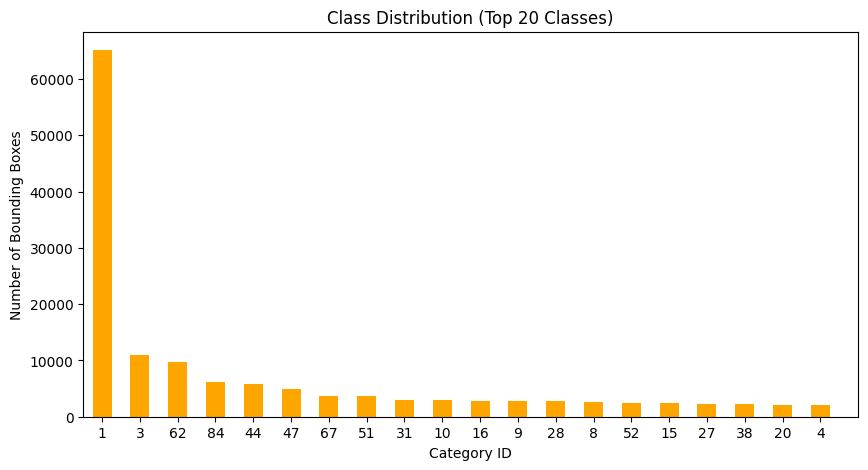

Category Mapping:
1 -> person, 2 -> bicycle, 3 -> car, 4 -> motorcycle, 5 -> airplane, 6 -> bus, 7 -> train, 8 -> truck, 9 -> boat, 10 -> traffic light, 11 -> fire hydrant, 13 -> stop sign, 14 -> parking meter, 15 -> bench, 16 -> bird, 17 -> cat, 18 -> dog, 19 -> horse, 20 -> sheep, 21 -> cow, 22 -> elephant, 23 -> bear, 24 -> zebra, 25 -> giraffe, 27 -> backpack, 28 -> umbrella, 31 -> handbag, 32 -> tie, 33 -> suitcase, 34 -> frisbee, 35 -> skis, 36 -> snowboard, 37 -> sports ball, 38 -> kite, 39 -> baseball bat, 40 -> baseball glove, 41 -> skateboard, 42 -> surfboard, 43 -> tennis racket, 44 -> bottle, 46 -> wine glass, 47 -> cup, 48 -> fork, 49 -> knife, 50 -> spoon, 51 -> bowl, 52 -> banana, 53 -> apple, 54 -> sandwich, 55 -> orange, 56 -> broccoli, 57 -> carrot, 58 -> hot dog, 59 -> pizza, 60 -> donut, 61 -> cake, 62 -> chair, 63 -> couch, 64 -> potted plant, 65 -> bed, 67 -> dining table, 70 -> toilet, 72 -> tv, 73 -> laptop, 74 -> mouse, 75 -> remote, 76 -> keyboard, 77 -> cell 

In [23]:
# Dictionary to map category ID to number of bounding boxes
class2nboxes = {}

for ann in coco1.dataset['annotations']:
    cat_id = ann['category_id']
    class2nboxes[cat_id] = class2nboxes.get(cat_id, 0) + 1 

# Sort categories by the number of bounding boxes in descending order
sorted_c2nb = sorted(class2nboxes.items(), key=lambda item: item[1], reverse=True)

# Select top 20 classes (or total available)
top = min(len(sorted_c2nb), 20)

# Extract data for plotting
y = [i[1] for i in sorted_c2nb[:top]]
x = [i[0] for i in sorted_c2nb[:top]]

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(y)), y, width=0.5, tick_label=x, color='orange')
plt.xlim(-0.5, len(y))
plt.xlabel('Category ID')
plt.ylabel('Number of Bounding Boxes')
plt.title('Class Distribution (Top 20 Classes)')
plt.show()

# Mapping category IDs to category names
categ_map = {x['id']: x['name'] for x in coco1.dataset['categories']}

# Print category mapping
print("Category Mapping:")
print(", ".join([f"{k} -> {v}" for k, v in categ_map.items()]))

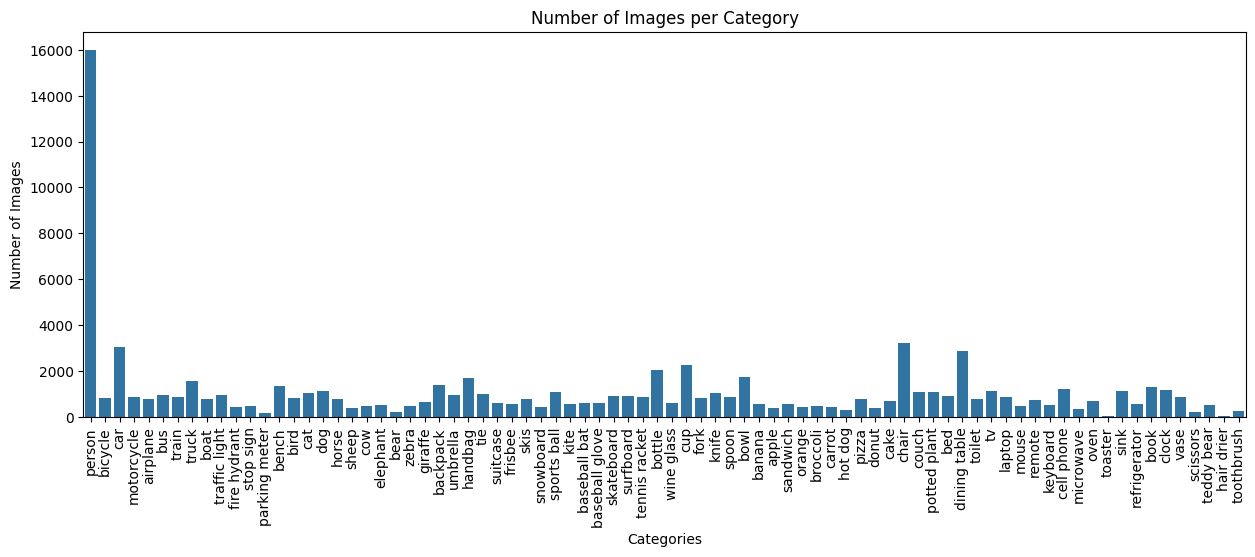

Most Common Category: ('person', 15978)
Least Common Category: ('hair drier', 36)


In [26]:
# Find the most and least common objects

# Count the number of images for each category
category_image_counts = {}
for cat_id in category_ids:
    img_ids = coco1.getImgIds(catIds=[cat_id])
    category_image_counts[coco1.loadCats([cat_id])[0]['name']] = len(img_ids)

# Plot category counts
plt.figure(figsize=(15, 5))
sns.barplot(x=list(category_image_counts.keys()), y=list(category_image_counts.values()))
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.title("Number of Images per Category")
plt.show()

sorted_categories = sorted(category_image_counts.items(), key=lambda x: x[1], reverse=True)
print("Most Common Category:", sorted_categories[0])
print("Least Common Category:", sorted_categories[-1])

Detected classes: ['tv', 'laptop', 'bottle', 'person', 'backpack', 'bottle', 'chair']


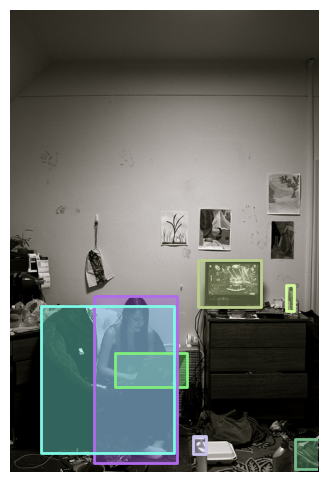

In [31]:
from skimage import io
import random

# Get all image and category IDs
img_ids = coco1.getImgIds()
cat_ids = coco1.getCatIds()

# Select a random image from the dataset
img = coco1.loadImgs(random.choice(img_ids))[0]
img_path = os.path.join(IMAGE_FOLDER, img['file_name'])

# Load the image using skimage
I = io.imread(img_path)

# Plot image
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(I)

# Get annotation IDs for the selected image
ann_ids = coco1.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco1.loadAnns(ann_ids)

# Disable segmentation (empty segmentation list)
for a in anns:
    a['segmentation'] = []

# Display annotations (bounding boxes)
coco.showAnns(anns, draw_bbox=True)

# Get class names for detected objects
class_names = [coco1.loadCats([a['category_id']])[0]['name'] for a in anns]
print("Detected classes:", class_names)

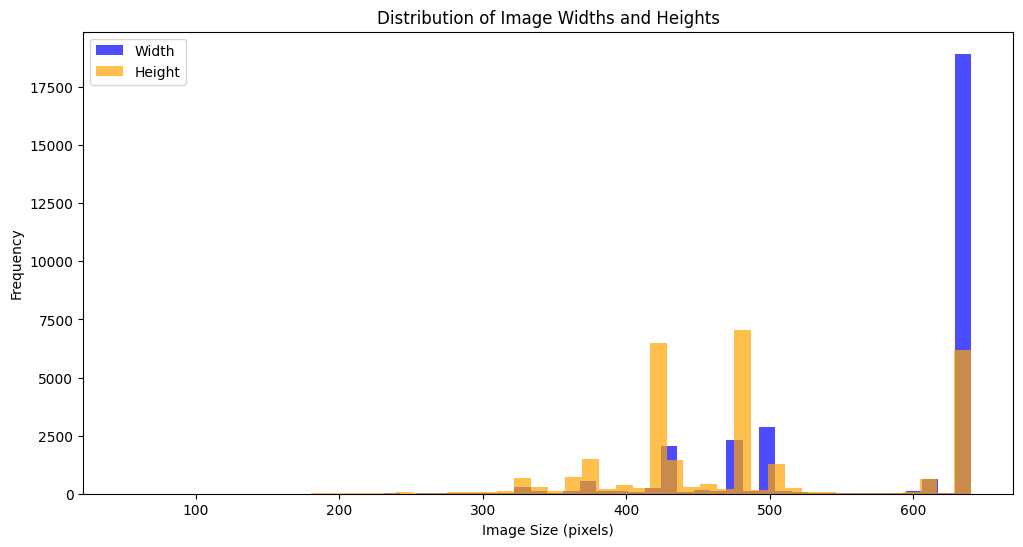

Mean Image Width: 577.51 pixels
Mean Image Height: 483.88 pixels
Median Image Width: 640.00 pixels
Median Image Height: 480.00 pixels
Min Image Size: 72 x 51 pixels
Max Image Size: 640 x 640 pixels


In [32]:
# Get image metadata
image_metadata = coco1.loadImgs(coco.getImgIds())

# Extract image widths and heights
image_sizes = [(img['width'], img['height']) for img in image_metadata]

# Convert to numpy array
image_sizes = np.array(image_sizes)

# Plot distribution of image sizes
plt.figure(figsize=(12,6))
plt.hist(image_sizes[:,0], bins=50, alpha=0.7, label="Width", color='blue')
plt.hist(image_sizes[:,1], bins=50, alpha=0.7, label="Height", color='orange')
plt.xlabel("Image Size (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths and Heights")
plt.legend()
plt.show()

# Print basic statistics
width_mean, height_mean = np.mean(image_sizes, axis=0)
width_median, height_median = np.median(image_sizes, axis=0)
width_min, height_min = np.min(image_sizes, axis=0)
width_max, height_max = np.max(image_sizes, axis=0)

print(f"Mean Image Width: {width_mean:.2f} pixels")
print(f"Mean Image Height: {height_mean:.2f} pixels")
print(f"Median Image Width: {width_median:.2f} pixels")
print(f"Median Image Height: {height_median:.2f} pixels")
print(f"Min Image Size: {width_min} x {height_min} pixels")
print(f"Max Image Size: {width_max} x {height_max} pixels")

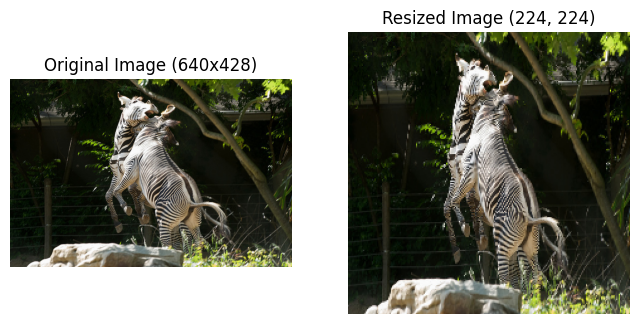

In [9]:
def resize_coco_image(coco, img_id, target_size=(224, 224)):
    # Load image metadata
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])  

    
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error: Could not load image {img_path}")
        return None
    
    # Get original size
    original_size = (img_info['width'], img_info['height'])
    
    # Resize the image
    resized = cv2.resize(image, target_size)

    # Display original and resized images
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f"Original Image ({original_size[0]}x{original_size[1]})")
    axes[0].axis("off")

    axes[1].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"Resized Image {target_size}")
    axes[1].axis("off")

    plt.show()
    
    return resized
    random_img_id = random.choice(coco1.getImgIds())
resized_img = resize_coco_image(coco1, random_img_id)

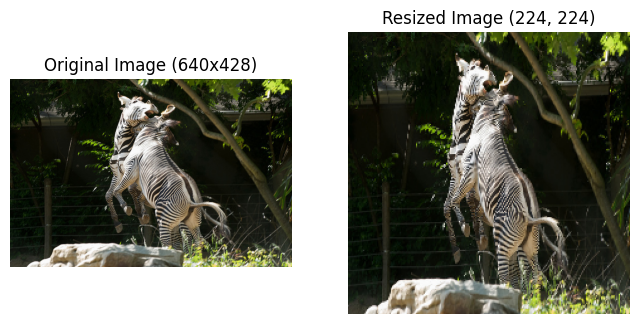

In [8]:
import random  # Make sure to import random

# Select a random image ID
random_img_id = random.choice(coco1.getImgIds())  

# Resize the selected image
resized_img = resize_coco_image(coco1, random_img_id)


In [25]:
import seaborn as sns


In [3]:
#Path to your COCO annotation file - json file

ANNOTATION_FILE_1 = r"C:\Users\Lenovo\Downloads\coco2017_subset\coco2017_subset\annotation_subset\instances_train2017_subset.json"

#Folder where the corresponding images are stored

IMAGE_FOLDER = r"C:\Users\Lenovo\Downloads\coco2017_subset\coco2017_subset\train2017"


In [4]:
#Initializing COCO API for instance annotations

coco1 = COCO(ANNOTATION_FILE_1)

loading annotations into memory...
Done (t=11.70s)
creating index...
index created!


In [21]:
import pandas as pd
import numpy as np
